In [1]:
from path import Path
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [2]:
data = Path('kc_house_data.csv')
df = pd.read_csv(data)
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df['Month'] = pd.DatetimeIndex(df['date']).month

In [4]:
df = df.drop(['date'], axis = 1)

In [5]:
df.columns.tolist()

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Month']

In [6]:
col_order = ['id','Month','price','bedrooms','bathrooms','sqft_living',
            'sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built',
             'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']


In [7]:
df = df[col_order]

In [8]:
df.head(10)

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [9]:
# Creating X
X = df.drop(['price'], axis = 1)
X.head()

,id,Month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Creating y
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [11]:


# Import Stat models to determine coefficient of columns 
import statsmodels.api as sm

In [12]:
mod = sm.OLS(y, X)

In [13]:

res = mod.fit()

In [14]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2805.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:02:48   Log-Likelihood:            -2.9458e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.286e-06   4.82e-07     -2.670

C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

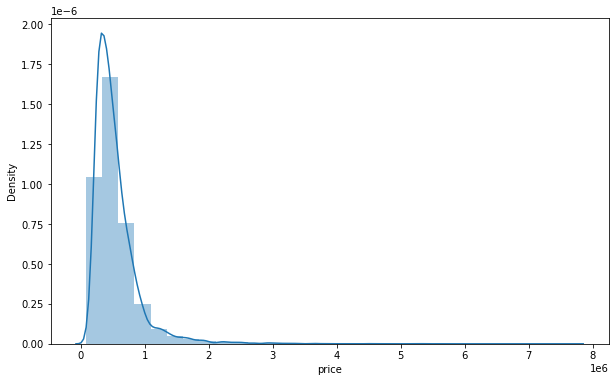

In [15]:
# Distribution of the dependent variable (price).
#Plot the distribution of price

plt.figure(figsize=(10, 6))
sns.distplot(df['price'],bins=30)

C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

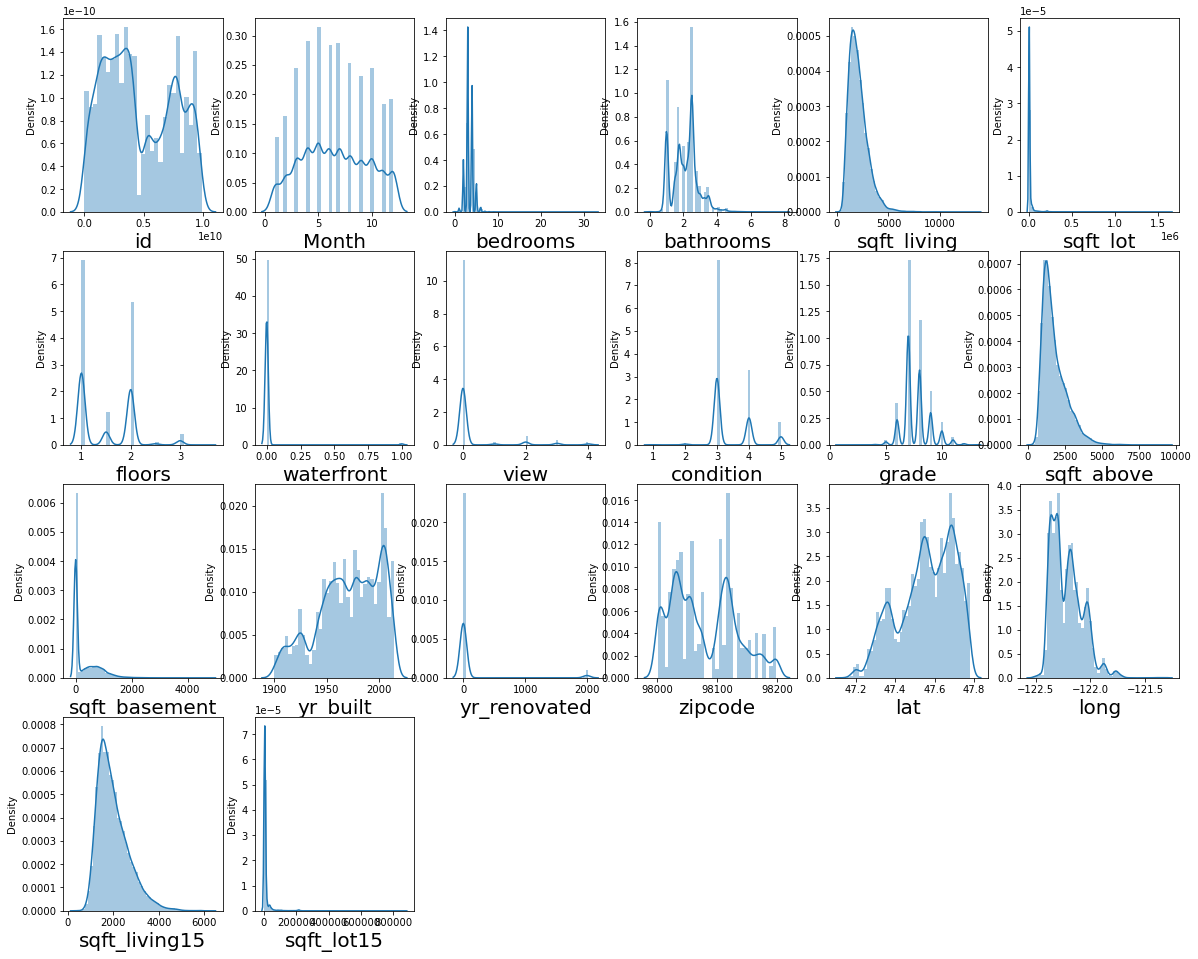

In [16]:
# How data is distributed for other columns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=28 :
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

In [17]:

# price mean
price_mean = df.mean()["price"]
price_mean

540088.1417665294

In [18]:

# determining the correlation between variables

corr = df.corr()
corr

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.011708,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
Month,-0.011708,1.000000,-0.010081,-0.001533,0.007392,0.011810,-0.002369,0.014005,0.008132,-0.005638,...,0.008376,0.009872,0.006035,-0.006226,0.012827,-0.000171,0.014961,-0.008134,0.002449,0.003546
price,-0.016762,-0.010081,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.001533,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.007392,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.011810,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,-0.002369,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.014005,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.008132,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.005638,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


<AxesSubplot:>

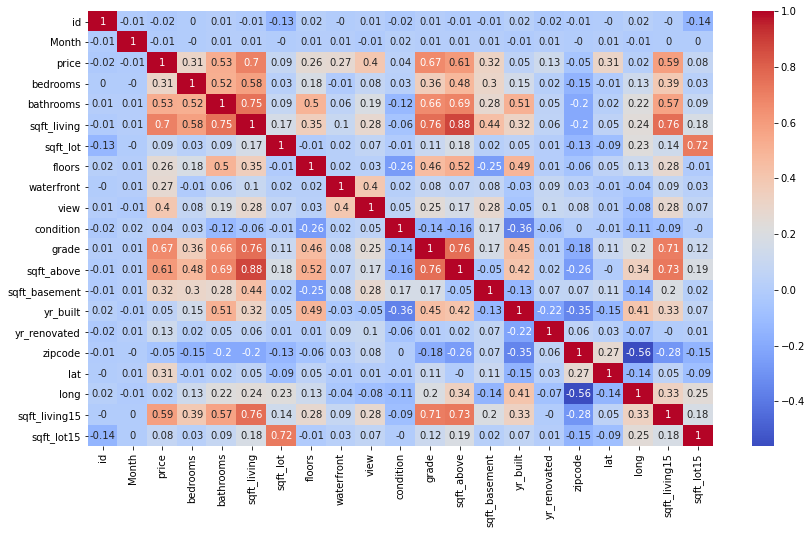

In [19]:
# Plot the correlation heatmap

plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

Text(0, 0.5, 'sqft_living15')

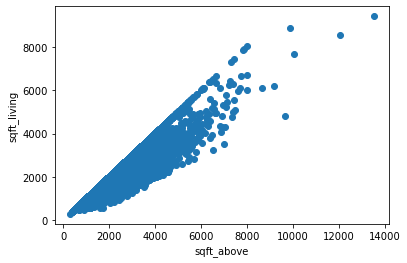

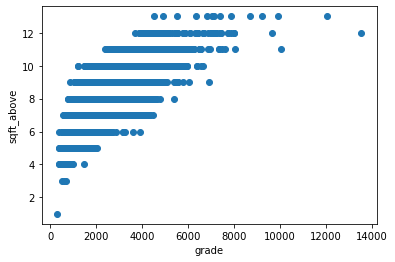

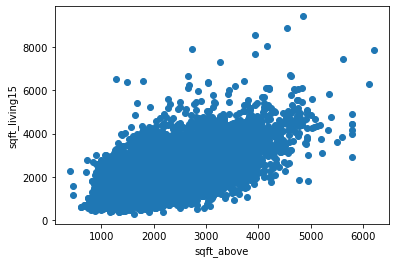

In [20]:
#Scatter plot to observe the correlations between the features that are highly correlated to each other

target_var = df['sqft_above']
plot1 = plt.figure(1)
plt.scatter(df['sqft_living'],target_var)
plt.xlabel('sqft_above')
plt.ylabel('sqft_living')
                                 
                                 
target_var = df['grade']
plot2 = plt.figure(2)
plt.scatter(df['sqft_living'],target_var)
plt.xlabel('grade')
plt.ylabel('sqft_above')

target_var = df['sqft_above']                                 
plot2 = plt.figure(3)
plt.scatter(df['sqft_living15'],target_var)
plt.xlabel('sqft_above')
plt.ylabel('sqft_living15')

Text(0, 0.5, 'sqft_above')

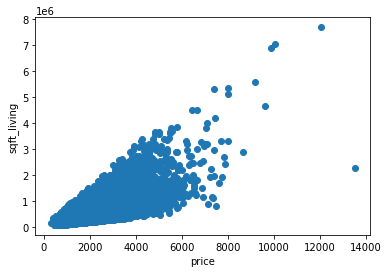

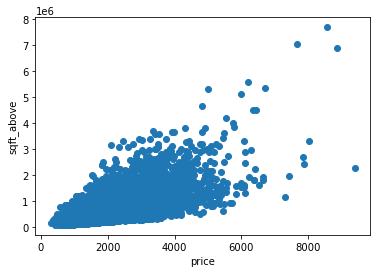

In [21]:
#Scatter plot to observe the correlations between the features that are highly correlated with price
target_var = df['price']
plot1 = plt.figure(1)
plt.scatter(df['sqft_living'],target_var)
plt.xlabel('price')
plt.ylabel('sqft_living')
plot2 = plt.figure(2)
plt.scatter(df['sqft_above'],target_var)
plt.xlabel('price')
plt.ylabel('sqft_above')

In [22]:
# Creating X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(15129, 20)

In [24]:
# Creating a StandardScaler instance.
numerical_features = [e for e in X_train.columns if e not in ('condition','waterfront','grade')]
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_train_numerical_features = X_train.loc[:,numerical_features]
X_train_numerical_features_scaled = scaler.fit_transform(X_train_numerical_features.values)
X_train.loc[:,numerical_features]= X_train_numerical_features_scaled
X_test.loc[:,numerical_features] =scaler.transform(X_test.loc[:,numerical_features].values)



C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\asmaa\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [25]:
# Machine Learning Linear Regression
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Declaring a variable to hold Linear Regression as linear_reg
linear_reg = LinearRegression().fit(X_train, y_train) 

In [26]:
# Declearing a variable to predit price as y_pred
y_pred = linear_reg.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(5)

,Prediction,Actual
0,4.510340e+05,365000.0
1,7.410319e+05,865000.0
2,1.235450e+06,1038000.0
3,1.670056e+06,1490000.0
4,7.306410e+05,711000.0


In [27]:
 #Evaluate a score by cross-validation
# CV (cross-validation generator or an iterable) = 10 
cross_val_score(linear_reg, X, y, cv=10)

array([0.6955615 , 0.69899595, 0.68927195, 0.6926956 , 0.68035148,
       0.70561594, 0.71323353, 0.71040972, 0.69936734, 0.67369246])

In [28]:
# Linear Regression score
linear_reg.score(X_test,y_test)

0.7003190976547877

In [29]:
# Machine Learning Decision Tree Regressor
# Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [30]:
# Declaring a variable to hold Decision Tree Regressor as regressor_tree
regressor_tree = DecisionTreeRegressor(random_state=79)

In [31]:
# Declearing a variable to predit price as y_pred
y_pred = regressor_tree.fit(X_train, y_train).predict(X_test)
results_tree = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
results_tree.head(5)

,Prediction,Actual
735,436500.0,365000.0
2830,825000.0,865000.0
4106,1029900.0,1038000.0
16218,1925000.0,1490000.0
19964,625000.0,711000.0


In [32]:
# Evaluate a score by cross-validation
# CV (cross-validation generator or an iterable) = 10 
cross_val_score(regressor_tree, X, y, cv=10)

array([0.81759649, 0.78681602, 0.76128754, 0.76092808, 0.6734723 ,
       0.64395646, 0.75322446, 0.76112512, 0.72789787, 0.80135755])

In [33]:

# Decision Tree Regressor score
linear_reg.score(X_test,y_test)

0.7003190976547877

In [34]:

# Machine Learning Random Forest Regressor
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [35]:

# Declaring a variable to hold Random Forest Regressor as regressor_forest
regressor_forest = RandomForestRegressor(max_depth=2, random_state=79)

In [36]:
# Declearing a variable to predit price as y_pred
y_pred = regressor_forest.fit(X_train, y_train).predict(X_test)
results_forest = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
results_forest.head(5)

,Prediction,Actual
735,3.171966e+05,365000.0
2830,5.248408e+05,865000.0
4106,8.807146e+05,1038000.0
16218,1.440580e+06,1490000.0
19964,8.144612e+05,711000.0


In [37]:
# Evaluate a score by cross-validation
# CV (cross-validation generator or an iterable) = 10 
cross_val_score(regressor_forest, X, y, cv=10)

array([0.51834514, 0.53612901, 0.55970558, 0.49169129, 0.51062762,
       0.54908181, 0.56218064, 0.55970309, 0.55793741, 0.51878254])

In [38]:

# Random Forest Regressor score
regressor_forest.score(X_test,y_test)

0.5079507440917355